In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_examination.csv')
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


<H4> Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
df['height_m'] = df['height']/100
df['overweight'] = df['weight']/(df['height_m'] ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251


In [4]:
def recode_value(value):
    if value > 25:
        return 1
    else:
        return 0

# Apply the recode function to the 'Values' column
df['overweight'] = df['overweight'].apply(recode_value)

In [5]:
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int64

<H4> Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
def normalize(value):
    if value == 1:
        return 0
    else:
        return 1

df['cholesterol'] = df['cholesterol'].apply(normalize)
df['gluc'] = df['gluc'].apply(normalize)

In [7]:
df[['cholesterol','gluc']].head()

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


<H4> Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [8]:
df['Cardio'] = df.index % 2

In [23]:
categorical_feature = df[['active','alco','cholesterol','gluc','overweight','smoke']]

In [27]:
df_long = pd.melt(df, id_vars='Cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'],
                  var_name='categorical_feature', value_name='Count')
df_long

,Cardio,categorical_feature,Count
0,0,active,1
1,1,active,1
2,0,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,1,smoke,1
419996,0,smoke,0
419997,1,smoke,0
419998,0,smoke,0


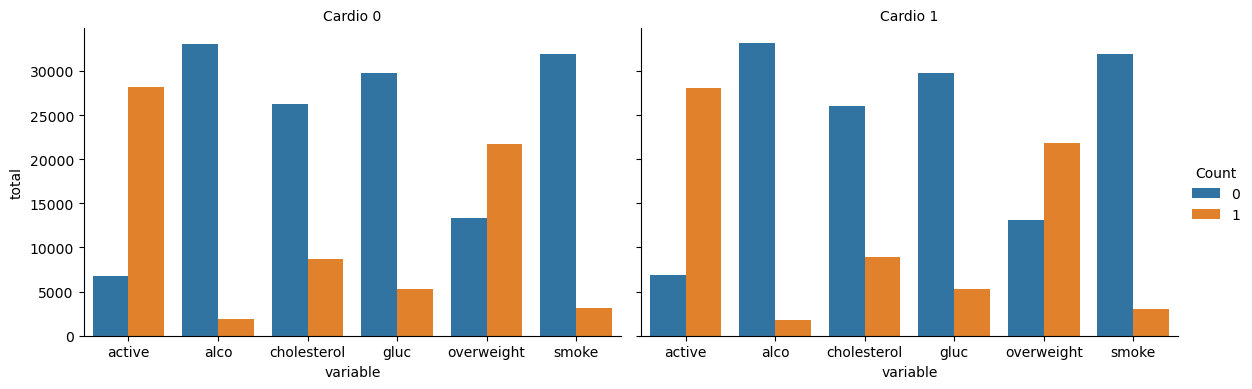

In [31]:
g = sns.catplot(x='categorical_feature', hue='Count', col='Cardio',
                data=df_long, kind='count', height=4, aspect=1.5)

# Set plot labels and titles
g.set_axis_labels('variable', 'total')
g.set_titles('Cardio {col_name}')
g.legend.set_title('Count')

# Show the plot
plt.show()

<H4> Clean the data. Filter out the following patient segments that represent incorrect data:

   - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
   - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
   - height is more than the 97.5th percentile
   - weight is less than the 2.5th percentile
   - weight is more than the 97.5th percentile


In [33]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,overweight,Cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,0,0


In [35]:
condition_correct = df[df['ap_lo'] <= df['ap_hi']]

In [42]:
condition_correct

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,overweight,Cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,1,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,1,0


In [43]:
percentile_2_5 = condition_correct['height'].quantile(0.025)
filtered_1 = condition_correct[condition_correct['height'] >= percentile_2_5]
filtered_1

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,overweight,Cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,1,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,1,0


In [44]:
percentile_2_5_height = df['height'].quantile(0.025)
percentile_97_5_height = df['height'].quantile(0.975)
percentile_2_5_weight = df['weight'].quantile(0.025)
percentile_97_5_weight = df['weight'].quantile(0.975)

# Filter out incorrect data based on percentiles
filtered_2 = filtered_1[(filtered_1['height'] >= percentile_2_5_height) &
                   (filtered_1['height'] <= percentile_97_5_height) &
                   (filtered_1['weight'] >= percentile_2_5_weight) &
                   (filtered_1['weight'] <= percentile_97_5_weight)]
filtered_2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,overweight,Cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,0,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,1.72,0,1
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.65,1,0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,1,0


<H4> Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

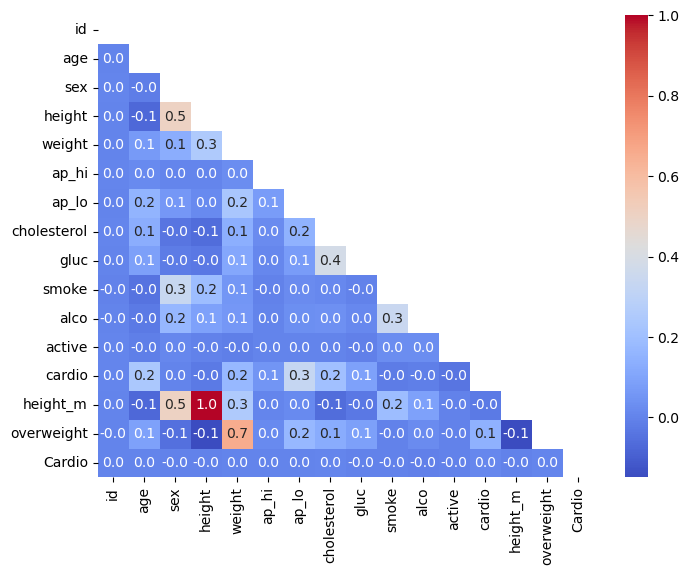

In [50]:
corr_matrix = filtered_2.corr()
mask = np.triu(np.ones_like(corr_matrix))
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm',mask=mask)
plt.show()